# Geocoding

http://results.openaddresses.io/

In [3]:
import os, zipfile
#datadir = os.path.join("/media", "disk-1")
datadir = os.path.join("..", "..", "..", "..", "Data")
filename = os.path.join(datadir, "openaddr-collected-us_south.zip")

In [4]:
zf = zipfile.ZipFile(filename)
for f in zf.filelist:
    if f.filename.startswith("us/tx/dallas"):
        print(f)

<ZipInfo filename='us/tx/dallas.vrt' compress_type=deflate filemode='?rw-------' file_size=336 compress_size=197>
<ZipInfo filename='us/tx/dallas.csv' compress_type=deflate filemode='-rw-------' file_size=39643782 compress_size=10904243>


In [5]:
with zf.open('us/tx/dallas.vrt') as f:
    print(f.read().decode())

<OGRVRTDataSource>
    <OGRVRTLayer name="dallas">
        <SrcDataSource relativeToVRT="1">dallas.csv</SrcDataSource>
        <GeometryType>wkbPoint</GeometryType>
        <LayerSRS>EPSG:4326</LayerSRS>
        <GeometryField encoding="PointFromColumns" reportSrcColumn="FALSE" x="LON" y="LAT"/>
    </OGRVRTLayer>
</OGRVRTDataSource>



In [6]:
import pandas as pd
with zf.open('us/tx/dallas.csv') as f:
    frame = pd.read_csv(f, low_memory=False)

In [7]:
frame.head()

,LON,LAT,NUMBER,STREET,UNIT,CITY,DISTRICT,REGION,POSTCODE,ID,HASH
0,-96.820104,33.010956,NaN,NaN,NaN,,COLLIN COUNTY,NaN,NaN,NaN,9e61faffd7d3fea4
1,-96.833575,33.022194,NaN,NaN,NaN,,COLLIN COUNTY,NaN,NaN,NaN,765e66a8800205e3
2,-96.833410,33.019028,NaN,NaN,NaN,,COLLIN COUNTY,NaN,NaN,NaN,f5365da60d8eebb9
3,-96.742040,32.986111,NaN,NaN,NaN,,COLLIN COUNTY,NaN,NaN,NaN,fe7e651c8e266b8a
4,-96.741748,32.986108,NaN,NaN,NaN,,COLLIN COUNTY,NaN,NaN,NaN,d26456a2f75557df


In [11]:
import geopandas as gpd
import shapely.geometry

f = gpd.GeoDataFrame(frame[frame.LON.notnull()])
f.geometry = [shapely.geometry.Point(x,y) for x, y in zip(f.LON, f.LAT)]
f.drop(["LON", "LAT"], axis=1)
f.crs = {"init" : "epsg:4326"}

In [13]:
f.to_file(os.path.join(datadir, "dallas_street_addr"))

In [40]:
frame = frame[frame.STREET.notnull()]

In [52]:
victor_street = frame[frame.STREET.str.lower().str.contains("victor ")]
victor_street.head()

,LON,LAT,NUMBER,STREET,UNIT,CITY,DISTRICT,REGION,POSTCODE,ID,HASH
299991,-96.763062,32.799924,5119,VICTOR ST,NaN,DALLAS,DALLAS COUNTY,NaN,NaN,NaN,7cfcf9e82dfb3fa8
300000,-96.763186,32.799819,5115,VICTOR ST,NaN,DALLAS,DALLAS COUNTY,NaN,NaN,NaN,9a7cbfdce5501cb8
300009,-96.762923,32.800038,5123,VICTOR ST,NaN,DALLAS,DALLAS COUNTY,NaN,NaN,NaN,39f0b1d08f4845bc
300019,-96.763306,32.799719,5111,VICTOR ST,NaN,DALLAS,DALLAS COUNTY,NaN,NaN,NaN,47028ce7dc2db44e
300039,-96.763554,32.799512,5101,VICTOR ST,NaN,DALLAS,DALLAS COUNTY,NaN,NaN,NaN,5f1c8b914ea7bc23


In [48]:
%matplotlib inline
import tilemapbase
import matplotlib.pyplot as plt

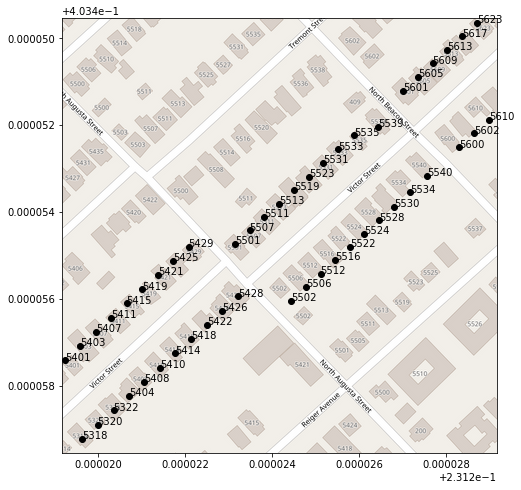

In [55]:
lon = victor_street.LON.mean()
lat = victor_street.LAT.mean()
ex = tilemapbase.Extent.from_centre_lonlat(lon, lat, xsize=0.00001)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=600)

fig, ax = plt.subplots(figsize=(8,8))
plotter.plot(ax)

for x, y, n in zip(victor_street.LON, victor_street.LAT, victor_street.NUMBER):
    x, y = tilemapbase.project(x, y)
    if ex.xmin <= x and x <= ex.xmax and ex.ymin <= y and y <= ex.ymax:
        ax.text(x, y, n)
        ax.scatter(x, y, marker="o", color="black")

In [56]:
meyers = frame[frame.STREET.str.lower().str.contains("meyers ")]
meyers.head()

,LON,LAT,NUMBER,STREET,UNIT,CITY,DISTRICT,REGION,POSTCODE,ID,HASH
334900,-96.770112,32.776268,2530,MEYERS ST,NaN,DALLAS,DALLAS COUNTY,NaN,NaN,NaN,89f6679e91c3e606
334915,-96.772474,32.776581,2414,MEYERS ST,NaN,DALLAS,DALLAS COUNTY,NaN,NaN,NaN,4468af72f858dd78
334919,-96.772757,32.776826,2404,MEYERS ST,NaN,DALLAS,DALLAS COUNTY,NaN,NaN,NaN,50d664c23c61e649
334930,-96.772190,32.776336,2426,MEYERS ST,NaN,DALLAS,DALLAS COUNTY,NaN,NaN,NaN,ffb74381a53a2b38
334931,-96.773100,32.776342,2411,MEYERS ST,NaN,DALLAS,DALLAS COUNTY,NaN,NaN,NaN,98e02232525fe1c7


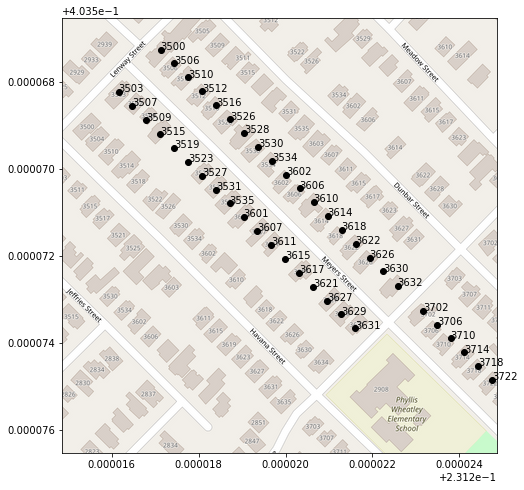

In [62]:
lon = meyers.LON.mean()
lat = meyers.LAT.mean()
ex = tilemapbase.Extent.from_centre_lonlat(lon, lat, xsize=0.0001)
ex = ex.with_translation(0.15, 0.15)
ex = ex.with_scaling(10)
plotter = tilemapbase.Plotter(ex, tilemapbase.tiles.OSM, width=600)

fig, ax = plt.subplots(figsize=(8,8))
plotter.plot(ax)

for x, y, n in zip(meyers.LON, meyers.LAT, meyers.NUMBER):
    x, y = tilemapbase.project(x, y)
    if ex.xmin <= x and x <= ex.xmax and ex.ymin <= y and y <= ex.ymax:
        ax.text(x, y, n)
        ax.scatter(x, y, marker="o", color="black")

# Can we lookup what we want?

In [65]:
datadir = os.path.join("/media", "disk", "Data")
filename = os.path.join(datadir, "Dallas_11_Sept_2017.csv")
crimes = pd.read_csv(filename, low_memory=False)
crimes = crimes[crimes["UCR Offense Description"] == "BURGLARY"]
crimes.head()

,Incident Number w/ Year,Year of Incident,Incident Number wo/ Year,Offense Service Number,Service Number ID,Watch,Call (911) Problem,Type of Incident,Penalty Class,Type of Location,...,UCR Offense Description,Offense Type,Modus Operandi (MO),Family Offense,Hate Crime,Gang Related Offense,Victim Package,Drug Related Incident,Update Date,Location1
0,276285-2016,2016,276285,276285D,276285-2016-01,U,11R - BURG OF RES,BURGLARY OF HABITATION - FORCED ENTRY,F2,Apartment Residence,...,BURGLARY,PART1,UNKNOWN SUSPECT GAINED FORCED ENTRY TO APT AND...,No,NaN,No,NaN,No,11/26/2016 08:29:01 PM,"5850 BELT LINE RD\nDALLAS, TX 75254\n(32.95394..."
12,276021-2016,2016,276021,276021D,276021-2016-02,1,11B - BURG OF BUS,BURGLARY OF BUILDING - FORCED ENTRY,FS,Business Office,...,BURGLARY,NOT CODED,SUSP BROKE GLASS ENTER PREMISS TOOK PROPERTY,No,NaN,No,NaN,No,12/09/2016 05:15:00 PM,"347 W JEFFERSON BLVD\nDALLAS, TX 75208\n(32.74..."
36,277150-2016,2016,277150,277150D,277150-2016-01,2,11B - BURG OF BUS,BURGLARY OF BUILDING - FORCED ENTRY,FS,Other,...,BURGLARY,PART1,UNK SUSP TOOK COMP'S PROPERTY W/OUT CONSENT.,No,NaN,No,NaN,No,11/22/2016 04:53:49 PM,"12379 MERIT DR\nDALLAS, TX 75251\n(32.918179, ..."
69,276331-2016,2016,276331,276331D,276331-2016-01,3,11R/01 - BURG OF RES,BURGLARY OF HABITATION -NO FORCED ENTRY,F2,Single Family Residence - Occupied,...,BURGLARY,PART1,UNK SUSP ENTERED COMP GARAGE TOOK PROPERTY WIT...,No,NaN,No,NaN,No,12/01/2016 08:56:00 AM,"5034 EAST RIM RD\nDALLAS, TX 75211\n(32.728901..."
71,276593-2015,2015,276593,276593C,276593-2015-01,1,41/11B - BURG BUSN IN PROGRESS,BURGLARY OF BUILDING - FORCED ENTRY,FS,Retail Store,...,BURGLARY,PART1,SUSPS SMASHED WALL WITH PICKUP AND TOOK COMP A...,No,NaN,No,NaN,No,12/30/2015 09:32:41 AM,"8032 FERGUSON RD\nDALLAS, TX 75228\n(32.802074..."


In [82]:
addresses = crimes["Incident Address"].as_matrix()
address = addresses[1]

In [83]:
i = address.find(" ")
number, street = address[:i], address[i+1:]
frame[(frame.STREET == street) & (frame.NUMBER == number)]

,LON,LAT,NUMBER,STREET,UNIT,CITY,DISTRICT,REGION,POSTCODE,ID,HASH


In [84]:
address

'347 W JEFFERSON BLVD'

In [98]:
st = frame[(frame.STREET == street)].copy()
st["NUMBER"] = st.NUMBER.map(int)
st = st.sort_values("NUMBER", axis=0)
st[(st.NUMBER>=300) & (st.NUMBER<400)]

,LON,LAT,NUMBER,STREET,UNIT,CITY,DISTRICT,REGION,POSTCODE,ID,HASH
371024,-96.826692,32.742847,300,W JEFFERSON BLVD,NaN,DALLAS,DALLAS COUNTY,NaN,NaN,NaN,dd14690bed4ca4cc
168024,-96.826895,32.743456,301,W JEFFERSON BLVD,NaN,DALLAS,DALLAS COUNTY,NaN,NaN,NaN,95aa5c612cb3b585
370974,-96.826885,32.742847,306,W JEFFERSON BLVD,NaN,DALLAS,DALLAS COUNTY,NaN,NaN,NaN,557aca5e2736dcac
370975,-96.826990,32.742847,310,W JEFFERSON BLVD,NaN,DALLAS,DALLAS COUNTY,NaN,NaN,NaN,7e9e1ab0de5b070a
370976,-96.827084,32.742848,312,W JEFFERSON BLVD,NaN,DALLAS,DALLAS COUNTY,NaN,NaN,NaN,99156ee618952363
370952,-96.827169,32.742848,314,W JEFFERSON BLVD,NaN,DALLAS,DALLAS COUNTY,NaN,NaN,NaN,e34488ef0d607aef
370956,-96.827373,32.742849,322,W JEFFERSON BLVD,NaN,DALLAS,DALLAS COUNTY,NaN,NaN,NaN,1c3d66f52c218c33
370958,-96.827619,32.742848,324,W JEFFERSON BLVD,NaN,DALLAS,DALLAS COUNTY,NaN,NaN,NaN,f77729c0add2d4e6
370964,-96.827782,32.742849,328,W JEFFERSON BLVD,NaN,DALLAS,DALLAS COUNTY,NaN,NaN,NaN,11a357556fdad6fa
370939,-96.827945,32.742850,332,W JEFFERSON BLVD,NaN,DALLAS,DALLAS COUNTY,NaN,NaN,NaN,7a87c605856e47e5
